# Regresi Linear Berganda pada Dataset Diabetes

# ```library yang digunakan```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import warnings
warnings.filterwarnings('ignore')

# ```dataset```

In [2]:
#memuat dataset

diabetes = datasets.load_diabetes()

In [3]:
#melihat konten pada dataset

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
#mencari nama fitur

diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
#memuat data dari semua fitur pada dataframe

df = pd.DataFrame(diabetes['data'],columns = diabetes['feature_names'])

In [6]:
#menampilkan target

diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
#menambahkan target pada dataframe

df.insert(10, column = "target", value = diabetes['target'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [8]:
#menampilkan 5 pengamatan pertama dari dataset

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
#menampilkan 5 pengamatan terakhir dari dataset

df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [10]:
#mendeteksi jumlah data duplikat

df.duplicated().sum()

0

In [11]:
#mendeteksi jumlah nilai yang hilang pada dataset

df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [12]:
#mengetahui tipe data dari masing-masing variabel

df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [13]:
#menampilkan statistik deskriptif dari dataset

df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


# ```exploratory data analysis```

<Axes: >

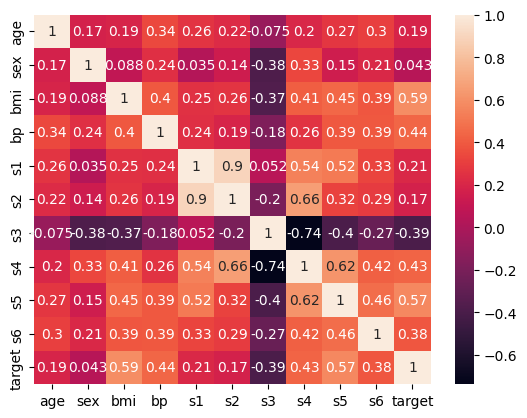

In [14]:
#menampilkan korelasi antar variabel

sns.heatmap(df.corr(), annot = True)

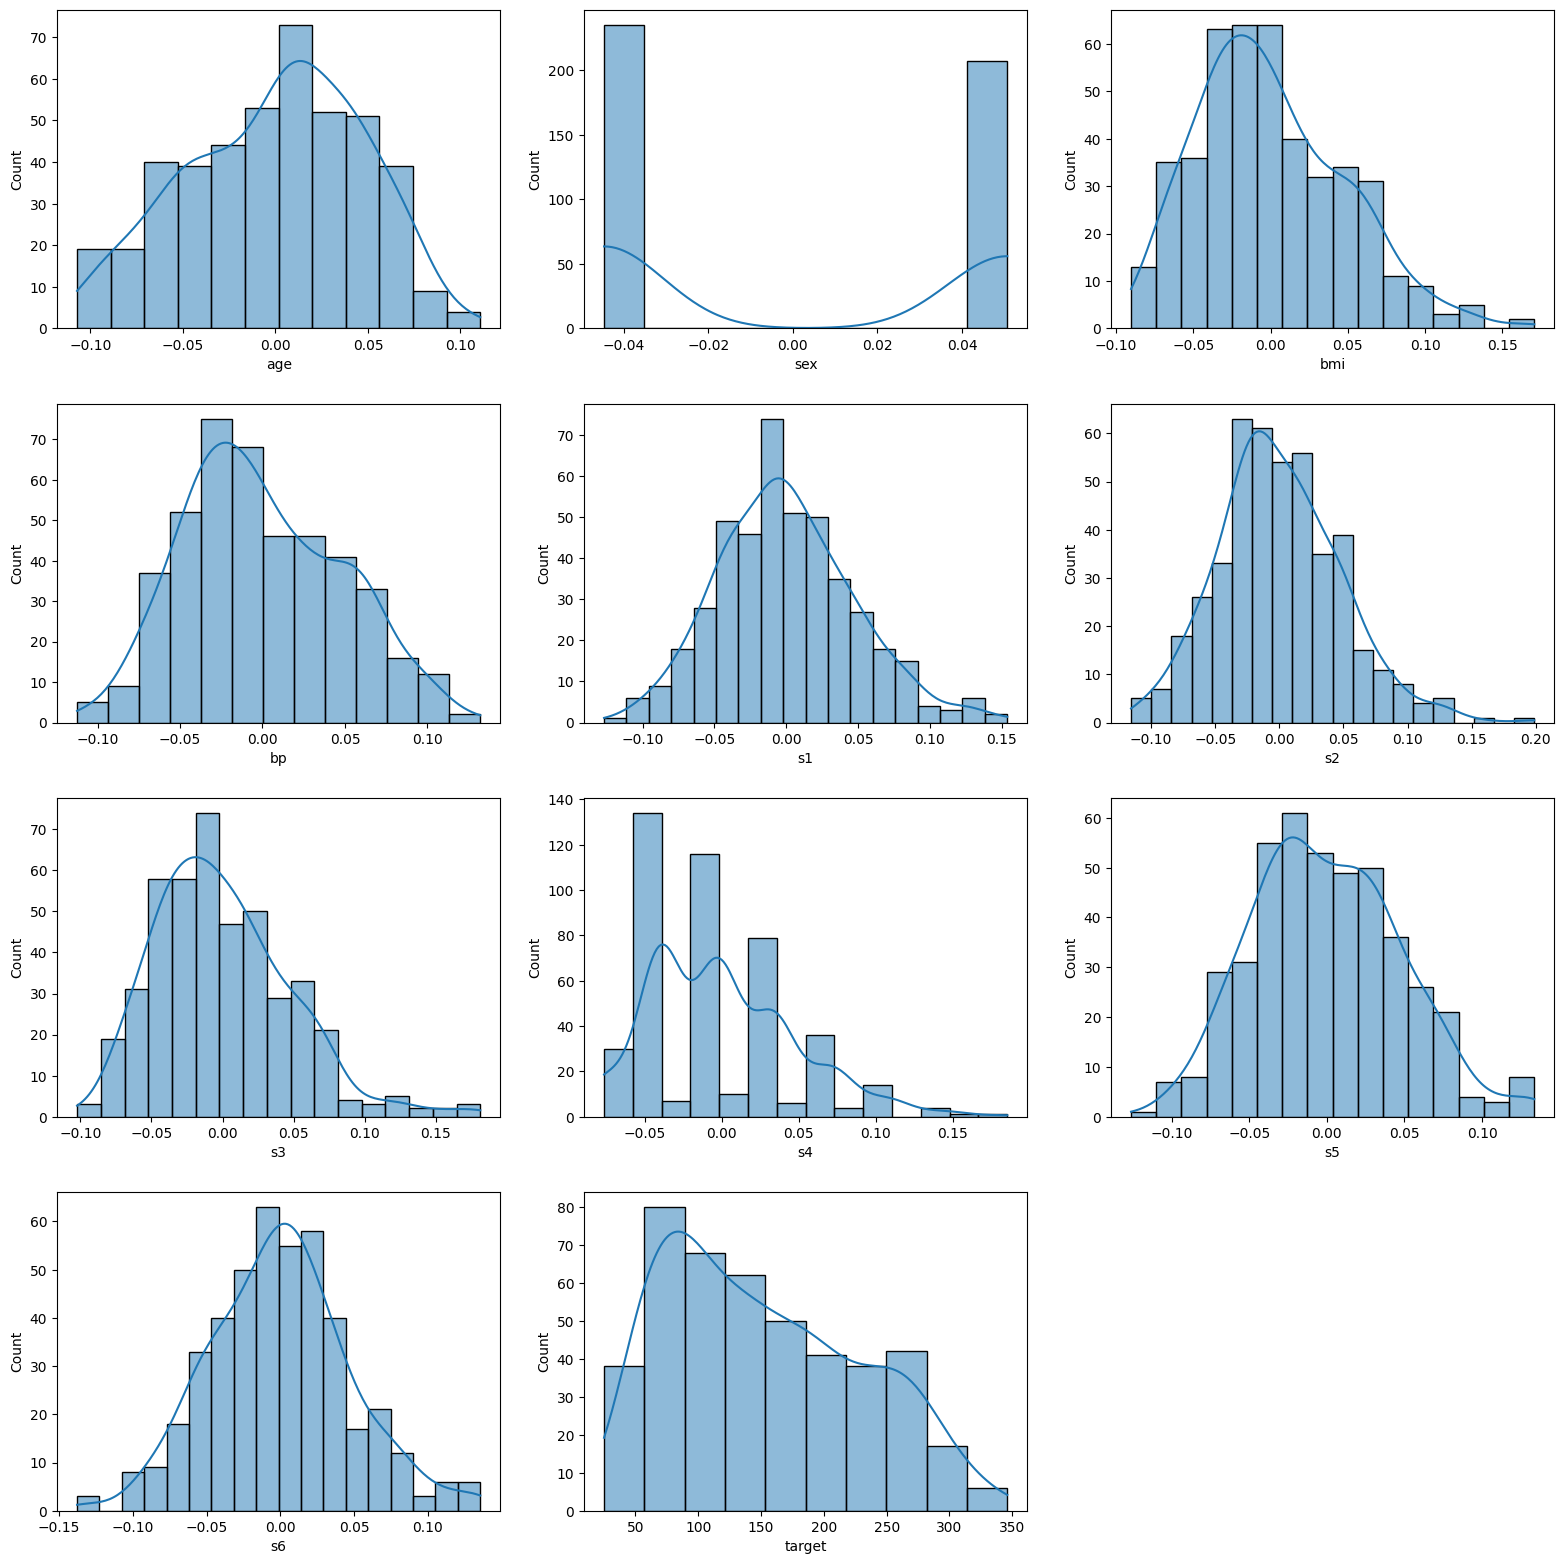

In [15]:
#menampilkan histogram dari dataset

fig = plt.figure(figsize = (16, 16))
for index, col in enumerate(df):
    plt.subplot(4, 3, index +1)
    sns.histplot(df.loc[:, col], kde = True)
fig.tight_layout(pad = 2)

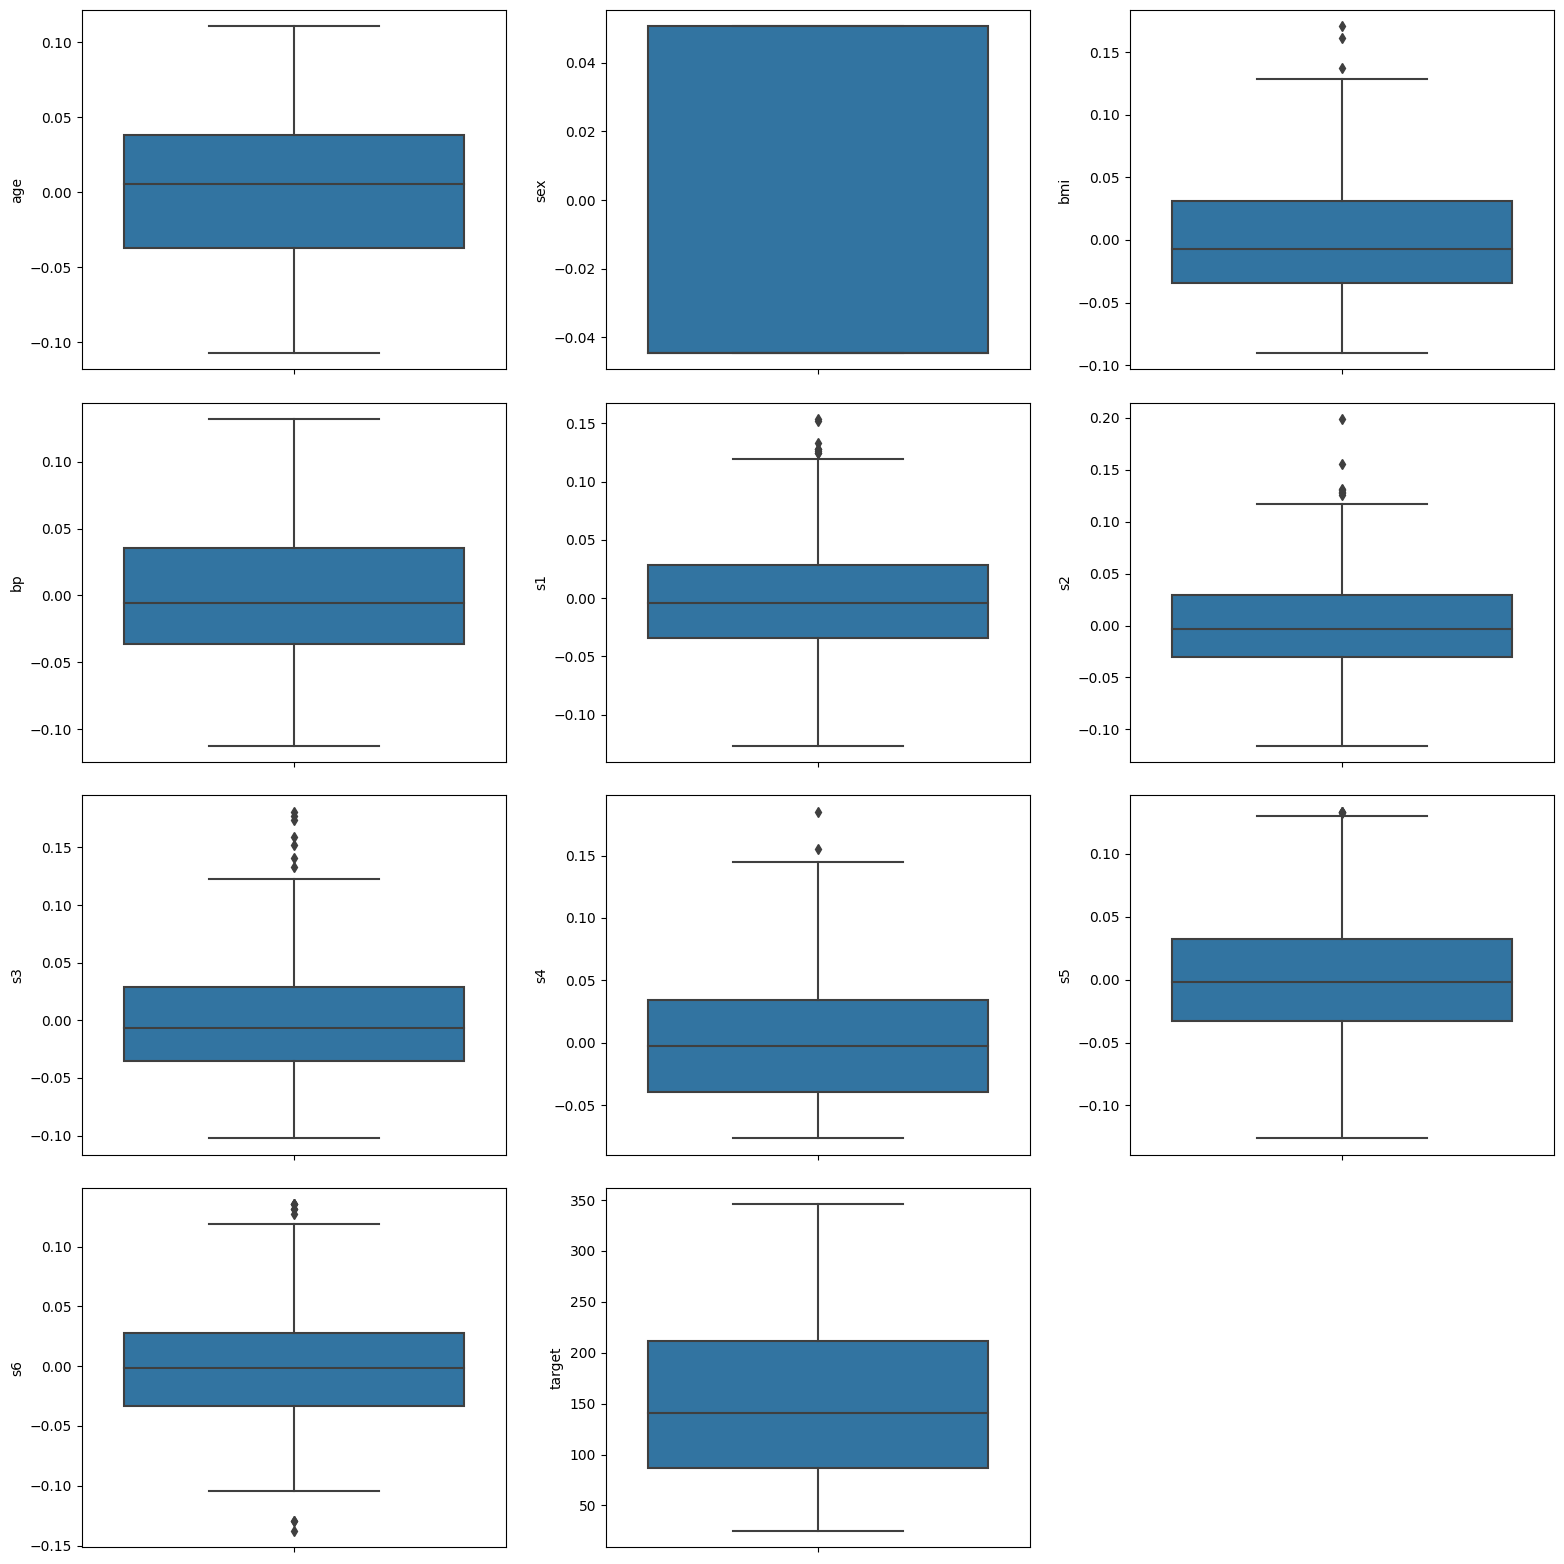

In [16]:
#menampilkan boxplot dari dataset

fig = plt.figure(figsize = (16, 16))
for index, col in enumerate(df):
    plt.subplot(4, 3, index +1)
    sns.boxplot(y = col, data = df)
fig.tight_layout(pad = 2)

# ```data splitting```

In [17]:
#memisahkan data ke dalam variabel bebas (X) dan variabel terikat (y)

X = df.drop(['target'], axis = 1)
y = df['target']

In [18]:
#memisahkan data ke dalam subset pelatihan dan pengujian dengan perbandingan 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [19]:
#train_set

train_set = pd.DataFrame(X_train)
train_set.insert(10, column = "target", value = y_train)
train_set

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
232,0.012648,0.050680,0.000261,-0.011420,0.039710,0.057245,-0.039719,0.056081,0.024055,0.032059,259.0
80,0.070769,-0.044642,0.012117,0.042529,0.071357,0.053487,0.052322,-0.002592,0.025395,-0.005220,143.0
46,-0.056370,-0.044642,-0.011595,-0.033213,-0.046975,-0.047660,0.004460,-0.039493,-0.007977,-0.088062,190.0
381,-0.070900,0.050680,-0.089197,-0.074527,-0.042848,-0.025739,-0.032356,-0.002592,-0.012909,-0.054925,104.0
...,...,...,...,...,...,...,...,...,...,...,...
255,0.001751,-0.044642,-0.065486,-0.005670,-0.007073,-0.019476,0.041277,-0.039493,-0.003301,0.007207,153.0
72,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,202.0
396,-0.085430,0.050680,-0.030996,-0.022885,-0.063487,-0.054236,0.019187,-0.039493,-0.096435,-0.034215,43.0
235,0.067136,0.050680,-0.014828,0.058608,-0.059359,-0.034508,-0.061809,0.012906,-0.005142,0.048628,124.0


In [20]:
#test_set

test_set = pd.DataFrame(X_test)
test_set.insert(10, column = "target", value = y_test)
test_set

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
246,0.041708,-0.044642,-0.032073,-0.061892,0.079612,0.050982,0.056003,-0.009972,0.045067,-0.059067,78.0
425,-0.078165,-0.044642,-0.040696,-0.081413,-0.100638,-0.112795,0.022869,-0.076395,-0.020292,-0.050783,152.0
293,-0.070900,-0.044642,0.092953,0.012680,0.020446,0.042527,0.000779,0.000360,-0.054540,-0.001078,200.0
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0
359,0.038076,0.050680,0.005650,0.032201,0.006687,0.017475,-0.024993,0.034309,0.014821,0.061054,311.0
...,...,...,...,...,...,...,...,...,...,...,...
277,-0.034575,-0.044642,-0.059019,0.001215,-0.053855,-0.078035,0.067048,-0.076395,-0.021395,0.015491,64.0
132,0.016281,0.050680,-0.021295,-0.009113,0.034206,0.047850,0.000779,-0.002592,-0.012909,0.023775,107.0
213,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022517,0.007207,49.0
286,-0.038207,-0.044642,-0.054707,-0.077970,-0.033216,-0.086490,0.140681,-0.076395,-0.019198,-0.005220,60.0


# ```pemodelan regresi linear berganda dengan pendekatan backward elimination```

In [21]:
#menambahkan konstanta pada model

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
y_hat = model.fit()
y_hat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     39.07
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           8.13e-51
Time:                        10:47:46   Log-Likelihood:                -1904.0
No. Observations:                 353   AIC:                             3830.
Df Residuals:                     342   BIC:                             3873.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.4301      2.884     52.507      0.000     145.758     157.103
age          -30.6222     67.596     -0.453      0.651    -163.579     102.335
sex         -272.2506     68.504     -3.974      0.000    -406.993    -137.509
bmi          528.8525     74.319      7.116      0.000     382.672     675.033
bp           327.6972     73.665      4.448      0.000     182.803     472.591
s1          -581.0197    463.930     -1.252      0.211   -1493.535     331.496
s2           332.9706    371.410      0.897      0.371    -397.566    1063.507
s3           -27.9731    242.785     -0.115      0.908    -505.513     449.567
s4           139.2804    182.137      0.765      0.445    -218.968     497.529
s5           665.0767    191.044      3.481      0.001     289.307    1040.846
s6            61.9052     72.009      0.860      0.391     -79.731     203.542
==============================================================================
Omnibus:                        5.164   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.962
Skew:                          -0.142   Prob(JB):                        0.138
Kurtosis:                       2.565   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ```interpretasi```

Tidak semua variabel bebas berpengaruh secara signifikan terhadap model sehingga beberapa variabel bebas perlu dihilangkan secara bertahap dengan mengeluarkan variabel bebas yang memiliki p-value terbesar kemudian melakukan regresi ulang.

In [22]:
#variabel s3 tidak berpengaruh secara signifikan terhadap model karena variabel s3 memiliki p-value yang lebih besar dari α sehingga variabel s3 dapat dikeluarkan dari model

X_train = X_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]]
model = sm.OLS(y_train, X_train)
y_hat = model.fit()
y_hat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     43.53
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.20e-51
Time:                        10:47:46   Log-Likelihood:                -1904.0
No. Observations:                 353   AIC:                             3828.
Df Residuals:                     343   BIC:                             3867.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.4366      2.879     52.596      0.000     145.773     157.100
age          -30.6897     67.496     -0.455      0.650    -163.449     102.069
sex         -271.9092     68.341     -3.979      0.000    -406.330    -137.489
bmi          529.1522     74.167      7.135      0.000     383.273     675.031
bp           328.0369     73.500      4.463      0.000     183.469     472.605
s1          -627.5162    228.528     -2.746      0.006   -1077.008    -178.024
s2           365.1154    244.819      1.491      0.137    -116.420     846.651
s4           153.6599    132.466      1.160      0.247    -106.888     414.208
s5           680.8825    132.770      5.128      0.000     419.736     942.029
s6            61.6440     71.870      0.858      0.392     -79.717     203.005
==============================================================================
Omnibus:                        5.121   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                3.938
Skew:                          -0.141   Prob(JB):                        0.140
Kurtosis:                       2.567   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#variabel age tidak berpengaruh secara signifikan terhadap model karena variabel age memiliki p-value yang lebih besar dari α sehingga variabel age dapat dikeluarkan dari model

X_train = X_train.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9]]
model = sm.OLS(y_train, X_train)
y_hat = model.fit()
y_hat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     49.06
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.84e-52
Time:                        10:47:46   Log-Likelihood:                -1904.1
No. Observations:                 353   AIC:                             3826.
Df Residuals:                     344   BIC:                             3861.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.4556      2.876     52.668      0.000     145.800     157.112
sex         -274.9312     67.939     -4.047      0.000    -408.559    -141.303
bmi          527.2520     73.964      7.129      0.000     381.774     672.730
bp           321.9582     72.191      4.460      0.000     179.967     463.950
s1          -633.7123    227.858     -2.781      0.006   -1081.882    -185.542
s2           365.3511    244.536      1.494      0.136    -115.623     846.325
s4           156.1622    132.199      1.181      0.238    -103.858     416.182
s5           678.5577    132.519      5.120      0.000     417.908     939.207
s6            58.6258     71.480      0.820      0.413     -81.967     199.219
==============================================================================
Omnibus:                        5.201   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.923
Skew:                          -0.135   Prob(JB):                        0.141
Kurtosis:                       2.559   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#variabel s6 tidak berpengaruh secara signifikan terhadap model karena variabel s6 memiliki p-value yang lebih besar dari α sehingga variabel s6 dapat dikeluarkan dari model

X_train = X_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]]
model = sm.OLS(y_train, X_train)
y_hat = model.fit()
y_hat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     56.03
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           3.29e-53
Time:                        10:47:46   Log-Likelihood:                -1904.5
No. Observations:                 353   AIC:                             3825.
Df Residuals:                     345   BIC:                             3856.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.5080      2.874     52.725      0.000     145.856     157.160
sex         -270.1274     67.654     -3.993      0.000    -403.193    -137.062
bmi          535.7014     73.208      7.318      0.000     391.711     679.691
bp           332.4707     71.010      4.682      0.000     192.803     472.138
s1          -629.8712    227.702     -2.766      0.006   -1077.729    -182.013
s2           364.5663    244.418      1.492      0.137    -116.171     845.304
s4           163.8712    131.802      1.243      0.215     -95.365     423.107
s5           691.9968    131.440      5.265      0.000     433.473     950.521
==============================================================================
Omnibus:                        4.735   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.649
Skew:                          -0.129   Prob(JB):                        0.161
Kurtosis:                       2.574   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#variabel s4 tidak berpengaruh secara signifikan terhadap model karena variabel s4 memiliki p-value yang lebih besar dari α sehingga variabel s4 dapat dikeluarkan dari model

X_train = X_train.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
model = sm.OLS(y_train, X_train)
y_hat = model.fit()
y_hat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     65.01
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           8.34e-54
Time:                        10:47:46   Log-Likelihood:                -1905.3
No. Observations:                 353   AIC:                             3825.
Df Residuals:                     346   BIC:                             3852.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.5855      2.875     52.722      0.000     145.931     157.241
sex         -256.3122     66.788     -3.838      0.000    -387.673    -124.951
bmi          536.5242     73.263      7.323      0.000     392.428     680.620
bp           325.4509     70.841      4.594      0.000     186.117     464.785
s1          -802.0058    180.919     -4.433      0.000   -1157.845    -446.166
s2           587.8649    165.915      3.543      0.000     261.536     914.193
s5           812.8943     88.507      9.185      0.000     638.815     986.974
==============================================================================
Omnibus:                        4.568   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                3.673
Skew:                          -0.144   Prob(JB):                        0.159
Kurtosis:                       2.592   Cond. No.                         86.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ```evaluasi model```

Semua variabel bebas telah berpengaruh secara signifikan terhadap model dengan adjusted R-square sebesar 0.522. Hal ini menunjukkan bahwa kemampuan variabel bebas dalam penelitian ini mempengaruhi variabel terikat sebesar 52.2%.

# ```uji asumsi klasik```

> 1. Uji Normalitas

Hipotesis:

H0: Residu berdistribusi normal

H1: Residu tidak berdistribusi normal

Tingkat signifikansi:

α = 5% = 0.05

Statistik uji: Jarque-Berra

Daerah kritis:

Tolak H0 jika p-value < α

Keputusan:

Berdasarkan hasil di atas, diperoleh p-value JB = 0.159

Gagal tolak H0 karena p-value JB = 0.159 lebih besar daripada α = 0.05

Kesimpulan:

Residu berdistribusi normal

> 1. Uji Non-autokorelasi

Hipotesis:

H0: Tidak terdapat autokorelasi pada residu

H1: Terdapat autokorelasi negatif atau positif pada residu

Tingkat signifikansi:

α = 5% = 0.05

Statistik uji: Durbin-Watson

Daerah kritis:

Tolak H0            : jika 0 < DW < dl  atau 4 – dl < DW < 4

Gagal tolak H0      : jika du < DW < 4 – du

Tidak ada keputusan : jika dl < DW < du atau 4 – du < DW < 4 – dl

Keputusan:

Berdasarkan hasil di atas, diperoleh Nilai Durbin-Watson = 2.041

Berdasarkan hasil interpolasi pada tabel Durbin-Watson, diperoleh dl = 1.7674 dan du = 1.8838

Gagal tolak H0 karena Nilai Durbin-Watson = 2.041 terletak di antara du = 1.8838 dan 4 – du = 2.2326

Kesimpulan:

Tidak terdapat autokorelasi pada residu

In [26]:
#mencari Nilai VIF

lm = smf.ols(formula = "target~sex+bmi+bp+s1+s2+s5", data = train_set).fit()
y,X = dmatrices("target~sex+bmi+bp+s1+s2+s5", data = train_set, return_type = "dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

[1.0017802301118297, 1.220722233138246, 1.500813700678638, 1.3812052377555624, 8.957169217092003, 7.3912423740368185, 2.222872671997882]


> 1. Uji Non-multikolinearitas

Hipotesis:

H0: Tidak terdapat multikolinearitas antar variabel bebas

H1: Terdapat multikolinearitas antar variabel bebas

Tingkat signifikansi:

α = 5% = 0.05

Statistik uji: VIF

Daerah kritis:

Tolak H0 jika VIF > 10

Keputusan:

Berdasarkan hasil di atas, diperoleh semua Nilai VIF < 10

Gagal tolak H0 karena Nilai VIF pada semua variabel bebas kurang dari 10

Kesimpulan:

Tidak terdapat multikolinearitas antar variabel bebas

In [27]:
#uji Breusch-Pagan

_, p_value, _, _ = het_breuschpagan(y_hat.resid, X_train)

print("p-value BP = " + str(p_value))

p-value BP = 0.0015356411902298207


> 1. Uji Non-heteroskedastisitas

Hipotesis:

H0: Tidak terdapat heteroskedastisitas pada residu

H1: Terdapat heteroskedastisitas pada residu

Tingkat signifikansi:

α = 5% = 0.05

Statistik uji: Breusch-Pagan

Daerah kritis:

Tolak H0 jika p-value BP < α

Keputusan:

Berdasarkan hasil di atas, diperoleh p-value BP = 0.0015356411902298207

Tolak H0 karena karena p-value BP = 0.0015356411902298207 lebih kecil daripada α = 0.05

Kesimpulan:

Terdapat heteroskedastisitas pada residu

# ```prediksi```

In [28]:
#melakukan prediksi pada data testing

X_test = sm.add_constant(X_test)
X_test = X_test.iloc[:, [0, 2, 3, 4, 5, 6, 9]]
y_pred = y_hat.predict(X_test)

In [29]:
#membuat perbandingan antara data sebenarnya dengan prediksi pada data testing

perbandingan = np.column_stack([y_test, y_pred])
perbandingan

array([[ 78.        , 128.43201054],
       [152.        , 112.60573456],
       [200.        , 181.29291573],
       [ 59.        ,  70.75348131],
       [311.        , 169.06480073],
       [178.        , 197.00457511],
       [332.        , 221.3215389 ],
       [132.        , 119.39305909],
       [156.        , 164.85617513],
       [135.        , 130.63492919],
       [220.        , 216.47504516],
       [233.        , 198.35440898],
       [ 91.        ,  97.787805  ],
       [ 51.        ,  77.41575626],
       [195.        , 242.44243329],
       [109.        , 204.79840156],
       [217.        , 179.59032757],
       [ 94.        , 103.77915128],
       [ 89.        , 107.16474171],
       [111.        , 168.89715645],
       [129.        , 188.75645835],
       [181.        ,  82.55393311],
       [168.        , 140.51758593],
       [ 97.        , 110.11450671],
       [115.        ,  97.65223526],
       [202.        , 216.40296537],
       [ 84.        ,  88.96979115],
 

In [30]:
#menampilkan perbandingan dalam bentuk data frame

perbandingan_df = pd.DataFrame(perbandingan, columns = ["y test", "y pred"])
perbandingan_df

,y test,y pred
0,78.0,128.432011
1,152.0,112.605735
2,200.0,181.292916
3,59.0,70.753481
4,311.0,169.064801
...,...,...
84,64.0,111.684110
85,107.0,114.407149
86,49.0,99.920376
87,60.0,68.488763


# ```kesimpulan```

1. model terbaik merupakan model dengan variabel bebas sex, bmi, bp, s1, s2, dan s5
1. model terbaik menunjukkan bahwa variabel bebas mempengaruhi variabel terikat sebesar 52.2%
1. model terbaik lolos uji asumsi normalitas, uji asumsi non-autokorelasi, dan uji asumsi non-multikolinearitas, tetapi tidak lolos uji asumsi non-heteroskedastisitas, sehingga dapat dilakukan penelitian lebih lanjut menggunakan metode yang berbeda